In [1]:
import veloxchem as vlx
import multipsi as mtp
import numpy as np

In [2]:
mol_str = """3

O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

molecule = vlx.Molecule.read_xyz_string(mol_str)
basis = vlx.MolecularBasis.read(molecule, "6-31g")
scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205310 a.u. Time: 0.05 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -75.983870373952    0.0000000000      0.00006826      0.00001638      0.00000000                


                  2       -75.983870375702   -0.0000000017      0.00002636      0.00000475      0.00006304                


                  3       -75.983870375765   -0.0000000001      0.00000396      0.00000061      0.00000524                


                  4       -75.983870375769   -0.0000000000      0.00000029      0.00000008      0.00000296                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.05 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -75.9838703758 a.u.                                              
               Electronic Energy                  :      -85.1400150952 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002874 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -1.036166 a.u.        -2.633670 Debye                                     
                                 Total :         1.036166 a.u.         2.633670 Debye                                     
                

In [3]:
molecule.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
# Compute the 5 lowest states of water using full CI

space=mtp.OrbSpace(molecule,scf_drv.mol_orbs)
# Full CI with frozen 1s orbital
space.fci(n_frozen=1)

nstates=5
cidrv=mtp.CIDriver()
ci_results = cidrv.compute(molecule,basis,space,nstates)

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 1
               Number of active orbitals:              12
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(8,12)

               CI expansion:
               -------------
               Number of determinants:      245025


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰──────────────────────────

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.684672475    -4.3e-14      4.3e-01           5    0:00:00


        2     -75.788930814    -1.0e-01      5.1e-02          10    0:00:00


        3     -75.799112270    -1.0e-02      5.9e-03          15    0:00:00


        4     -75.800337767    -1.2e-03      1.0e-03          20    0:00:00


        5     -75.800533861    -2.0e-04      1.9e-04          25    0:00:00


        6     -75.800568191    -3.4e-05      3.8e-05          30    0:00:00


        7     -75.800573348    -5.2e-06      7.8e-06          35    0:00:00


        8     -75.800574691    -1.3e-06      5.4e-06          40    0:00:00


        9     -75.800575153    -4.6e-07      2.3e-06          45    0:00:00


       10     -75.800575306    -1.5e-07      5.7e-07          49    0:00:00


       11     -75.800575334    -2.8e-08      7.5e-08          30    0:00:00


       12     -75.800575338    -3.9e-09      1.5e-08          32    0:00:00


       13     -75.800575339    -8.5e-10      7.0e-09          33    0:00:00


                                                                                                                          
** Convergence reached in 13 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -76.12020540259738
  - Natural orbitals
1.98825 1.96801 1.97145 1.98065 0.00050 0.02822 0.00310 0.01813 0.02666 0.01218 0.00063 0.00222
                                                                                                                          
* State 2
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.80967663210242
  - Natural orbitals
1.98999 1.96500 1.97826 0.99416 0.99612 0.03529 0.00360 0.00679 0.01598 0.00969 0.00250 0.00263
          

In [5]:
au2ev = 27.211386

# Get the molecular orbitals within the active space
C=space._get_active_mos()

# Compute dipole integrals in AO basis
dipole_drv = vlx.ElectricDipoleIntegralsDriver()
dipole_mats = dipole_drv.compute(molecule, basis)
dipole=[dipole_mats.x_to_numpy(),dipole_mats.y_to_numpy(),dipole_mats.z_to_numpy()]

# Transform to MO basis
dipole_mo=[]
for icomp in range(0,3):
    dipole_mo.append(np.einsum('pq,pt,qu->tu', dipole[icomp], C, C))
    

# Initialize the CIOperator class to compute the transition densities.
expansion=mtp.CIExpansion(space)
DenDriver=mtp.CIOperator(expansion, cidrv.comm)
energies = ci_results["energies"]
ci_vectors = ci_results["ci_vectors"]
        
# Compute all 0->n transitions
for n in range(1,nstates):
    dE=energies[n]-energies[0]
    tden=DenDriver.get_1dm(ci_vectors, 0, ci_vectors, n) #Transition density matrix
    dx=np.tensordot(tden, dipole_mo[0]) #<0|x|n>
    dy=np.tensordot(tden, dipole_mo[1]) #<0|y|n>
    dz=np.tensordot(tden, dipole_mo[2]) #<0|z|n>
    F=2/3*dE*(dx*dx+dy*dy+dz*dz)
    print(f"Excitation 0->{n} energy: {dE*au2ev:5.3f} eV oscillator strength: {F:.5f}")

Excitation 0->1 energy: 8.450 eV oscillator strength: 0.01319
Excitation 0->2 energy: 10.685 eV oscillator strength: 0.00000


Excitation 0->3 energy: 10.977 eV oscillator strength: 0.11536
Excitation 0->4 energy: 13.377 eV oscillator strength: 0.11503


In [6]:
SI = mtp.StateInteraction()
si_results = SI.compute(molecule, basis, ci_results)

                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        8.44992         1.318942e-02    4.625244e-02
     1       4       10.97654         1.153567e-01    1.749731e-01
     1       5       13.37692         1.150314e-01    1.224456e-01
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 cgs)
     1       2        8.44992         5.713313e-10    2.693505e

In [7]:
nstates=5
# nstates-1 transitions for CIS, CISD, CISDT and CISDTQ and FCI
Energies=np.empty((5,nstates-1))
Energies[4,:]=au2ev*np.array(si_results['energies']) # Save the FCI result

#CIS to CISDTQ
space=mtp.OrbSpace(molecule,scf_drv.mol_orbs)
cidrv=mtp.CIDriver()
SI=mtp.StateInteraction()

for exc in range(1,5):
    space.ci(exc,n_frozen=1)
    ci_results = cidrv.compute(molecule,basis,space, nstates)
    si_results = SI.compute(molecule,basis,ci_results)
    Energies[exc-1,:]=au2ev*np.array(si_results['energies'])

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 1
               Number of active orbitals:              12
               Number of virtual orbitals:             0

               This is a GASSCF wavefunction

                        Cumulated   Min cumulated    Max cumulated
               Space     orbitals      occupation       occupation
                   1            4               7                8
                   2           12               8                8


               CI expansion:
               -------------
               Number of determinants:      65


                  

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.98387037576911
  - Natural orbitals
2.00000 2.00000 2.00000 2.00000 0.00000 0.00000 0.00000 0.00000 -0.00000 -0.00000 0.00000 0.00000
                                                                                                                          
* State 2
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -75.63914005847886
  - Natural orbitals
2.00000 2.00000 1.99997 1.00003 0.99997 0.00000 0.00000 0.00003 -0.00000 0.00000 -0.00000 -0.00000
     

                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        9.38059         1.468873e-02    4.091187e-02
     1       4       11.83172         1.208787e-01    1.355741e-01
     1       5       13.90237         1.045445e-01    8.623014e-02
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 cgs)


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 1
               Number of active orbitals:              12
               Number of virtual orbitals:             0

               This is a GASSCF wavefunction

                        Cumulated   Min cumulated    Max cumulated
               Space     orbitals      occupation       occupation
                   1            4               6                8
                   2           12               8                8


               CI expansion:
               -------------
               Number of determinants:      1425


                

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.684672475    -2.8e-14      4.3e-01           5    0:00:00


        2     -75.738323485    -5.4e-02      1.1e-02          10    0:00:00


        3     -75.740452181    -2.1e-03      4.8e-04          15    0:00:00


        4     -75.740697236    -2.5e-04      1.1e-04          20    0:00:00


        5     -75.740727932    -3.1e-05      1.4e-05          25    0:00:00


        6     -75.740732303    -4.4e-06      9.7e-06          30    0:00:00


        7     -75.740733490    -1.2e-06      1.3e-06          35    0:00:00


        8     -75.740733648    -1.6e-07      8.0e-08          40    0:00:00


        9     -75.740733657    -8.9e-09      7.2e-09          43    0:00:00


       10     -75.748799862    -8.1e-03      1.6e-01          44    0:00:00


       11     -75.764743724    -1.6e-02      5.7e-03          45    0:00:00


       12     -75.765384861    -6.4e-04      3.2e-04          48    0:00:00


       13     -75.765428583    -4.4e-05      4.0e-05          49    0:00:00


       14     -75.765434372    -5.8e-06      4.4e-06          50    0:00:00


       15     -75.765435181    -8.1e-07      6.9e-07          30    0:00:00


       16     -75.765435247    -6.6e-08      4.4e-08          31    0:00:00


       17     -75.765435251    -4.6e-09      2.2e-09          32    0:00:00


       18     -75.765435252    -2.6e-10      1.5e-10          33    0:00:00


                                                                                                                          
** Convergence reached in 18 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -76.11340211569879
  - Natural orbitals
1.98980 1.97263 1.97571 1.98356 0.00034 0.02409 0.00268 0.01544 0.02279 0.01054 0.00046 0.00195
                                                                                                                          
* State 2
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.73519313724866
  - Natural orbitals
1.99830 1.99110 1.99600 0.99907 0.99382 0.01175 0.00118 0.00147 0.00444 0.00171 0.00035 0.00082
          

                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2       10.29159         1.548860e-02    3.658373e-02
     1       5       12.78501         1.247443e-01    1.355467e-01
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 cgs)
     1       4       12.49886        -2.295130e-13   -1.082024e-10
     1       5       12.78501         2.251371e-13    1.061394e

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 1
               Number of active orbitals:              12
               Number of virtual orbitals:             0

               This is a GASSCF wavefunction

                        Cumulated   Min cumulated    Max cumulated
               Space     orbitals      occupation       occupation
                   1            4               5                8
                   2           12               8                8


               CI expansion:
               -------------
               Number of determinants:      12625


               

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.684672475    -7.1e-14      4.3e-01           5    0:00:00


        2     -75.784612940    -1.0e-01      2.0e-02          10    0:00:00


        3     -75.791286692    -6.7e-03      2.6e-03          15    0:00:00


        4     -75.792084611    -8.0e-04      3.8e-04          20    0:00:00


        5     -75.792189646    -1.1e-04      4.8e-05          25    0:00:00


        6     -75.792203247    -1.4e-05      2.0e-05          30    0:00:00


        7     -75.792206264    -3.0e-06      6.6e-06          35    0:00:00


        8     -75.792207573    -1.3e-06      4.0e-06          40    0:00:00


        9     -75.792207901    -3.3e-07      5.1e-07          44    0:00:00


       10     -75.792207945    -4.4e-08      5.5e-08          47    0:00:00


       11     -75.792207950    -4.4e-09      6.2e-09          49    0:00:00


       12     -75.792207950    -4.5e-10      2.6e-09          50    0:00:00


                                                                                                                          
** Convergence reached in 12 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -76.11438963604013
  - Natural orbitals
1.98960 1.97168 1.97493 1.98327 0.00047 0.02478 0.00289 0.01562 0.02338 0.01071 0.00060 0.00208
                                                                                                                          
* State 2
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.80003060597451
  - Natural orbitals
1.99159 1.97001 1.98187 0.99537 0.99592 0.03029 0.00318 0.00554 0.01330 0.00820 0.00236 0.00237
          

                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        8.55414         1.328929e-02    4.580098e-02
     1       4       11.07698         1.154310e-01    1.705735e-01
     1       5       13.44315         1.119829e-01    1.181224e-01
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 cgs)


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 1
               Number of active orbitals:              12
               Number of virtual orbitals:             0

               This is a GASSCF wavefunction

                        Cumulated   Min cumulated    Max cumulated
               Space     orbitals      occupation       occupation
                   1            4               4                8
                   2           12               8                8


               CI expansion:
               -------------
               Number of determinants:      55325


               

                                                                                                                          
                          CI Iterations
                         ----------------
                                                                                                                          
     Iter. | Average Energy | E. Change | Grad. Norm | Subs. size | Time
     ----------------------------------------------------------------------


        1     -75.684672475    -1.4e-14      4.3e-01           5    0:00:00


        2     -75.788930814    -1.0e-01      4.8e-02          10    0:00:00


        3     -75.798239112    -9.3e-03      3.9e-03          15    0:00:00


        4     -75.799234656    -1.0e-03      7.9e-04          20    0:00:00


        5     -75.799415298    -1.8e-04      1.3e-04          25    0:00:00


        6     -75.799440760    -2.5e-05      2.3e-05          30    0:00:00


        7     -75.799445003    -4.2e-06      5.0e-06          35    0:00:00


        8     -75.799446153    -1.1e-06      4.4e-06          40    0:00:00


        9     -75.799446589    -4.4e-07      1.6e-06          45    0:00:00


       10     -75.799446717    -1.3e-07      2.5e-07          49    0:00:00


       11     -75.799446735    -1.8e-08      3.9e-08          30    0:00:00


       12     -75.799446738    -2.4e-09      6.0e-09          31    0:00:00


       13     -75.799446738    -4.1e-10      4.5e-09          32    0:00:00


                                                                                                                          
** Convergence reached in 13 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -76.12003281942427
  - Natural orbitals
1.98832 1.96820 1.97163 1.98078 0.00049 0.02805 0.00308 0.01801 0.02650 0.01210 0.00062 0.00221
                                                                                                                          
* State 2
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -75.80828932708872
  - Natural orbitals
1.99041 1.96630 1.97922 0.99448 0.99598 0.03407 0.00351 0.00646 0.01523 0.00935 0.00243 0.00257
          

                                                                                                                          
List of oscillator strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Oscillator strength (length and velocity)
     1       2        8.48297         1.323128e-02    4.607677e-02
     1       4       11.01123         1.154582e-01    1.737606e-01
     1       5       13.40783         1.150823e-01    1.218343e-01
                                                                                                                          
List of rotatory strengths greather than 1e-10
                                                                                                                          
  From     to       Energy (eV)    Rot. strength (a.u. and 10^-40 cgs)
     1       5       13.40783         1.744417e-11    8.223943e

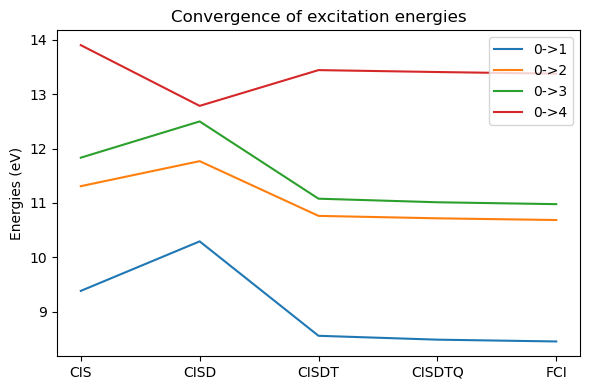

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
x = np.array(range(1,6))
plt.plot(x,Energies[:,0], label='0->1')
plt.plot(x,Energies[:,1], label='0->2')
plt.plot(x,Energies[:,2], label='0->3')
plt.plot(x,Energies[:,3], label='0->4')

plt.title('Convergence of excitation energies')
plt.xticks([1, 2, 3, 4, 5], ['CIS', 'CISD', 'CISDT', 'CISDTQ', 'FCI'])
plt.ylabel("Energies (eV)")
plt.legend()
plt.tight_layout(); plt.show()

In [9]:
Energies[0,:]

array([ 9.38058973, 11.30738694, 11.83172339, 13.90237127])